In [ ]:
# LOGISTIC REGRESSION MODEL
# TO FIND THE BEST PERFORMING FEATURE IN THE DATASET


The Independent Variables (Features):
        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns] (2200, 7)

The Dependent Variables (Numerical Target):
0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
219

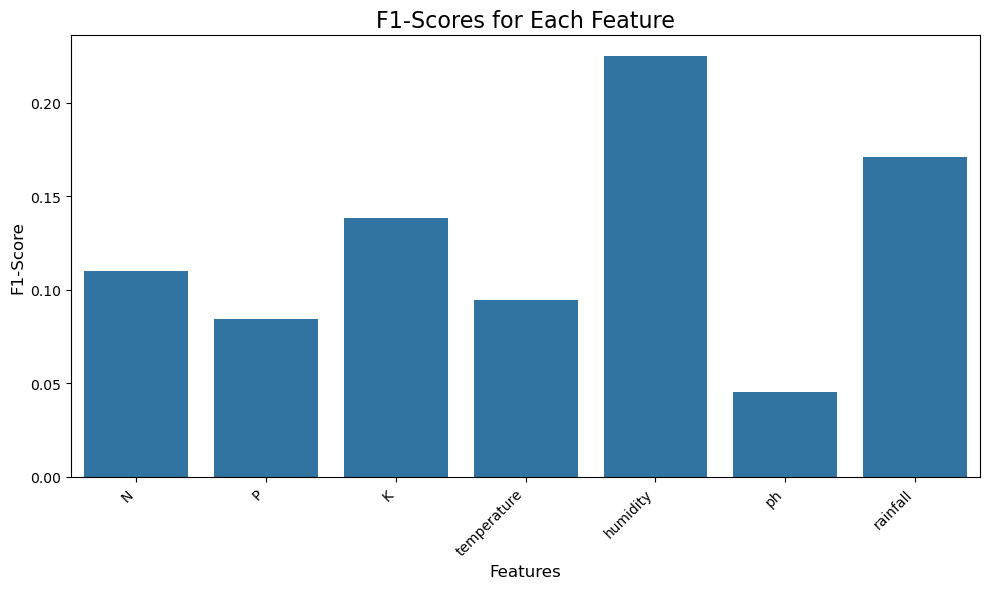

In [9]:
# All required libraries are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report

# Load the dataset from the local directory as CSV
# The dataset is a CSV file
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Use Label Encoding on target variable to make it suitable for training
# This converts the categorical target variable to numerical values 
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"]) # independent variable (features)
y = crops["label_encoded"] # dependent variable (Target in numerical values)
y2 = crops["label"] # dependent variable (Target in categorical values)
print(f"\nThe Independent Variables (Features):\n{X} {X.shape}\n\n"
     f"The Dependent Variables (Numerical Target):\n{y} {y.shape}\n\n"
     f"The Dependent Variables (Categorical Target):\n{y2} {y2.shape}")

# SPLIT THE DATA 
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store the model performance for each feature
feature_dictn = {}

# Train a Logistic Regression Model to reveal the best predictive feature
for feature in ["N","P","K","temperature","humidity","ph","rainfall"]:
    log_reg = LogisticRegression(solver='lbfgs', max_iter=200)
    log_reg.fit(X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1), y_train)
    
# MAKE PREDICTION
    y_pred = log_reg.predict(X_test_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1))
    
# EVALUATE MODEL PEFORMANCE
    # Calculate F1 score, the harmonic mean of precision and recall
    # Could also use balanced_accuracy_score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_dictn[feature] = f1
    print(f"F1-score for {feature}: {f1}")
    
# Identify the feature with the best F1 score
best_feature = max(feature_dictn, key=feature_dictn.get)
best_predictive_feature = {best_feature: feature_dictn[best_feature]}

print("\nBest Predictive Feature (Highest F1-score):", best_predictive_feature)

# Plot a Bar Chart for F1-scores of all features
plt.figure(figsize=(10, 6))
features = list(feature_dictn.keys())
f1_scores = list(feature_dictn.values())

# Creating the bar plot without the 'palette' argument
sns.barplot(x=features, y=f1_scores)

# Adding titles and labels
plt.title("F1-Scores for Each Feature", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
